In [2]:
# import trecs
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
from collections import defaultdict
from chaney_utils import (
    load_sim_results,
    merge_results,
    graph_metrics,
    graph_relative_to_ideal,
)

In [3]:
# Set this to False if you want to save the figures you generate
DEBUG = True

# Experimental analysis

In [4]:
id_to_readable = {
    "ideal": "ideal", 
    "target_ideal": "target ideal",
    "content_chaney": "content filtering basic",
    "content_chaney_j_1.0": "content filtering a=1.0",
    "content_chaney_j_3.0": "content filtering a=3.0",
    "content_chaney_j_0.5": "content filtering a=0.5",
    "popularity": "popularity", 
    "random": "random"
}

In [5]:
# replace with the experimental output directorie(s) from your experiment!
results = merge_results(["udpc_ouput"])

startup_iters = 50
sim_iters = 200
timesteps = startup_iters + sim_iters

c:\Users\0pink\anaconda3\lib\site-packages\numpy\core\_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
c:\Users\0pink\anaconda3\lib\site-packages\numpy\core\_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
c:\Users\0pink\anaconda3\lib\site-packages\numpy\core\_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
c:\Users\0pink\anaconda3\lib\site-packages\numpy\core\_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


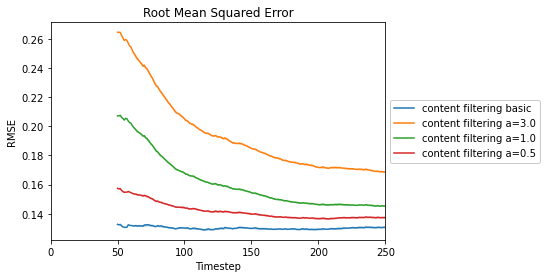

In [11]:
metric_str = "rmse"
model_keys = ["content_chaney", "content_chaney_j_3.0", "content_chaney_j_1.0", "content_chaney_j_0.5"]#, "random", "popularity"]

graph_metrics(results, metric_str, model_keys, id_to_readable, mult_sd=1.0, conf_sigma=3.0)
# graph_relative_to_ideal(results, "rmse", model_keys, id_to_readable, mult_sd=1.0, conf_sigma=3.0, absolute_measure=False)

plt.xlim(0, timesteps)
# plt.ylim(0.1,0.25)
plt.legend(facecolor='white', framealpha=1, loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Timestep")
plt.ylabel("RMSE")
plt.title("Root Mean Squared Error")
if not DEBUG:
    plt.savefig("figures/creator_repeated_item_homo.pdf")

#### Measuring: top attribute bias
for each interaction occasion, what percentage of users chose an item with the same top attribute as their top preferred attribute

In [ ]:
model_keys = ["ideal", "target_ideal", "content_chaney", "content_chaney_j_3.0", "content_chaney_j_1.0", "content_chaney_j_0.5", "random", "popularity"]
metric_str = "most_preffered_attribute_chosen"

# make relative to first timestep
for m in model_keys:
    x = np.array(results[metric_str][m]) # thesis:changed used to be creator_item_homo
    # x = x - x[:, np.newaxis] #thesis:TODO is this for normalization?? --> this is to make it relative to the first timestep
    results[metric_str][m] = x

graph_metrics(results, metric_str, model_keys, id_to_readable, mult_sd=1.0, conf_sigma=3.0)
# graph_relative_to_ideal(results, metric_str, model_keys, id_to_readable, mult_sd=1.0, conf_sigma=3.0, absolute_measure=False)

plt.xlim(0, timesteps)
plt.legend(facecolor='white', framealpha=1, loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Timestep")
plt.ylabel("Percent")
plt.title("% of users who chose an item with Most Preffered Attribute")
if not DEBUG:
    plt.savefig("figures/creator_repeated_item_homo.pdf")

### Measuring Homogenization

In [ ]:
model_keys = ["ideal", "target_ideal", "content_chaney", "content_chaney_j_3.0", "content_chaney_j_1.0", "content_chaney_j_0.5", "random", "popularity"]
metric_str = "mean_item_dist"

# make relative to first timestep
for m in model_keys:
    x = np.array(results[metric_str][m]) # thesis:changed used to be creator_item_homo
    # x = x - x[:, np.newaxis] #thesis:TODO is this for normalization?? --> this is to make it relative to the first timestep
    results[metric_str][m] = x

graph_metrics(results, metric_str, model_keys, id_to_readable, mult_sd=1.0, conf_sigma=3.0)
# graph_relative_to_ideal(results, metric_str, model_keys, id_to_readable, mult_sd=1.0, conf_sigma=3.0, absolute_measure=False)

plt.xlim(0, timesteps)
plt.legend(facecolor='white', framealpha=1, loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Timestep")
plt.ylabel("Distance)")
plt.title("Mean Item Distance")
if not DEBUG:
    plt.savefig("figures/creator_repeated_item_homo.pdf")
    
"The mean item distance cacluates the mean distance between items in each users' recommendation list based on their item attributes"

## Similarity measures

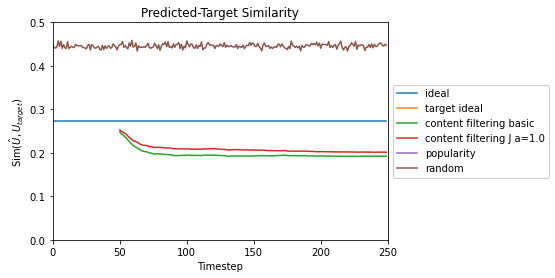

In [5]:
model_keys = ["ideal", "target_ideal", "content_chaney", "content_chaney_j_3.0", "content_chaney_j_1.0", "content_chaney_j_0.5", "random", "popularity"]
metric_str = 'predicted_target_similarity'

# make relative to first timestep
for m in model_keys:
    x = np.array(results[metric_str][m]) # thesis:changed used to be creator_item_homo
    # x = x - x[:, np.newaxis] #thesis:TODO is this for normalization?? --> this is to make it relative to the first timestep
    results[metric_str][m] = x

graph_metrics(results, metric_str, model_keys, id_to_readable)
# graph_relative_to_ideal(results, metric_str, model_keys, id_to_readable, mult_sd=1.0, conf_sigma=3.0, absolute_measure=False)

plt.xlim(0, timesteps)
plt.ylim(0,0.5)
plt.legend(facecolor='white', framealpha=1, loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Timestep")
plt.ylabel("Sim($\hat U, U_{target}$)")
plt.title("Predicted-Target Similarity")
if not DEBUG:
    plt.savefig("figures/creator_repeated_item_homo.pdf")

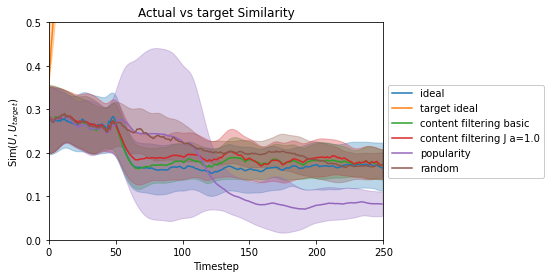

In [91]:
metric_str = "actual_target_similarity"
model_keys = ["ideal", "target_ideal", "content_chaney", "content_chaney_j_3.0", "content_chaney_j_1.0", "content_chaney_j_0.5", "random", "popularity"]
for m in model_keys:
    x = np.array(results[metric_str][m]) # thesis:changed used to be creator_item_homo
    # x = x - x[:, np.newaxis] #thesis:TODO is this for normalization??
    results[metric_str][m] = x
    
graph_metrics(results, metric_str, model_keys, id_to_readable, mult_sd=1.0, conf_sigma=3.0)
# graph_relative_to_ideal(results, metrc_str, model_keys, id_to_readable, mult_sd=1.0, conf_sigma=3.0, absolute_measure=False)

plt.xlim(0, timesteps)
plt.ylim(0,0.5)
plt.legend(facecolor='white', framealpha=1, loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Timestep")
plt.ylabel("Sim($U, U_{target}$)")
plt.title("Actual vs target Similarity")
if not DEBUG:
    plt.savefig("figures/creator_repeated_item_homo.pdf")

c:\Users\0pink\anaconda3\lib\site-packages\numpy\core\_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
c:\Users\0pink\anaconda3\lib\site-packages\numpy\core\_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
c:\Users\0pink\anaconda3\lib\site-packages\numpy\core\_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
c:\Users\0pink\anaconda3\lib\site-packages\numpy\core\_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


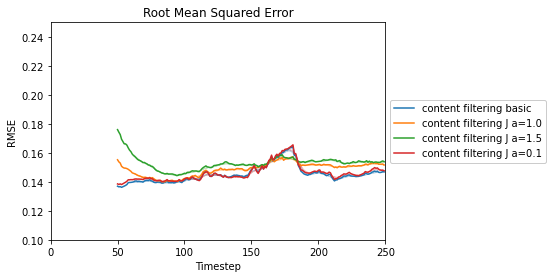

In [73]:
# calculate Dirichlet moment
def average_item(dirichlet_params, multiplier = 0.1):
    """
    Calculate the average item profile for a given vector of parameters
    for the Dirichlet distribution. 
    Multiplier is set to 0.1 for sparsity.
    """
    a0 = (multiplier * dirichlet_params).sum()
    return (multiplier * dirichlet_params) / a0

def item_avg_range_simulated(dirichlet_params, multiplier = 0.1, seed = 1234):
    """
    Calculate the per-property interquartile range
    Multiplier is set to 0.1 for sparsity.
    """
    # sample 1,000
    rng = np.random.default_rng(seed)
    items = rng.dirichlet(dirichlet_params * multiplier, size=10000)
    print(items.shape)
    q1 = np.percentile(items, 5, interpolation = 'midpoint', axis=0)
    q3 = np.percentile(items, 95, interpolation = 'midpoint', axis=0)
    # make relative to mean
    avg = items.mean(axis=0)
    return avg, np.vstack([avg - q1, avg - q3]) 

### Investigating Preference Drift
What happens when a ?user consumes an item with a certain attirbute? how are their preferences changed?

In [8]:
nA = 20
width = 0.3 #for the bar plots

# actual_profs = np.array(results['actual_user_profiles']['ideal']) 
# num_sims, num_steps, num_creators, num_attrs = actual_profs.shape

pref_before_cons = np.array([0.10933025155582786, 0.06693451751652005, 0.13405619765107082, 0.0034325736324136882, 0.0001361879155451763, 0.0017306647853878472, 0.0000010001161261870374, 0.08656679650928405, 0.024921454642869784, 0.04183545382032431, 0.013219514363157695, 0.2142594737322412, 0.0018481457322445942, 0.0012766587672027017, 0.002469486498769603, 0.0003566138185409538, 0.29422373086726883, 0.0000000004615107068394732, 0.0000020536753738491855, 0.003399178248760172])
chosen_item_attr = np.zeros(20) # approximately
chosen_item_attr[16] = 1.0

pref_after_cons = np.array([0.10047405182807766, 0.06151254649412467, 0.12319709476862627, 0.003154521060172587, 0.00014969141730983372, 0.001590473824669604, 9.191026094484117e-07, 0.07955453019901906, 0.022902714388617098, 0.03844661011548137, 0.012148679367006567, 0.19690357574488104, 0.0016984383319795411, 0.0011732441599404378, 0.002269447942680501, 0.00032772678144062843, 0.317203805613459, 0.00000004241264427579216, 0.000001887319227879073, 0.003123830839851375])

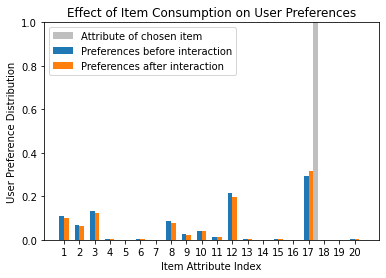

In [10]:
plt.bar(np.arange(nA)+width+width, chosen_item_attr, width, alpha=0.5, color="GREY", label="Attribute of chosen item")
plt.bar(np.arange(nA), pref_before_cons, width, label="Preferences before interaction")
plt.bar(np.arange(nA) + width, pref_after_cons, width, label="Preferences after interaction")
plt.ylim(0, 1.0)
plt.xticks(np.arange(nA) + width/2, np.arange(nA)+1)
plt.xlabel("Item Attribute Index")
plt.ylabel("User Preference Distribution")
plt.legend()
plt.title("Effect of Item Consumption on User Preferences")
# if not DEBUG:
plt.savefig("figures/preference_drift_visual.pdf")

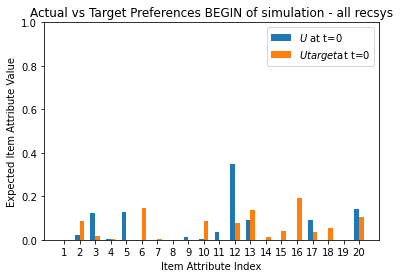

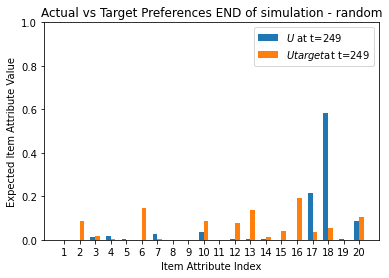

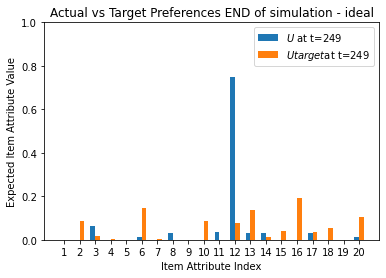

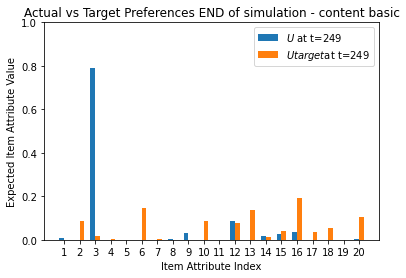

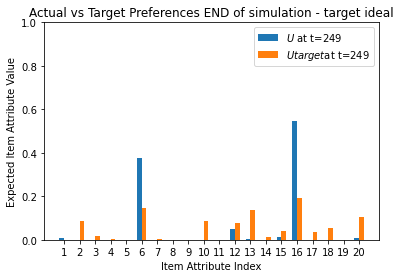

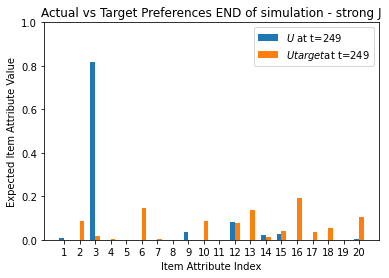

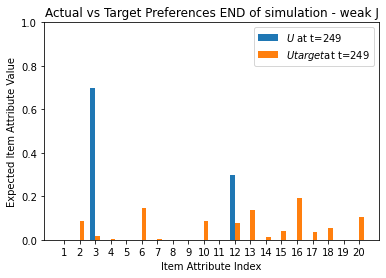

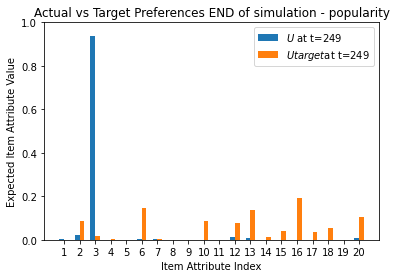

In [82]:
u = 0

target_profs = np.array(results['target_user_profiles']['content_chaney_j_0.1']) 
num_sims, num_steps, num_creators, num_attrs = target_profs.shape

actual_profs_strong_j = np.array(results['actual_user_profiles']['content_chaney_j_1.0']) 
actual_profs_weak_j = np.array(results['actual_user_profiles']['content_chaney_j_0.1']) 
actual_profs_ideal = np.array(results['actual_user_profiles']['ideal']) 
actual_profs_target_ideal = np.array(results['actual_user_profiles']['target_ideal']) 
actual_profs_target_rand = np.array(results['actual_user_profiles']['random']) 
actual_profs_pop = np.array(results['actual_user_profiles']['popularity']) 
actual_profs_content = np.array(results['actual_user_profiles']['content_chaney']) 


def plot_profiles(blue, bluelabel, orange=target_profs, timestep=timesteps-1, timelabel="END", user=u, norm_axis=True):
    plt.bar(np.arange(nA), average_item(blue[0, timestep, user, :]), width, label="$U$ at t={}".format(timestep))
    # plt.bar(np.arange(nA), blue[0, timestep, user, :], width, label="$U$ at t={}".format(timestep))

    if norm_axis:
        plt.ylim(0, 1) # to equalize the y axes
    plt.bar(np.arange(nA) + width, average_item(orange[0, timestep, user, :]), width, label="$U target $at t={}".format(timestep))
    plt.xticks(np.arange(nA) + width/2, np.arange(nA)+1)
    plt.xlabel("Item Attribute Index")
    plt.ylabel("Expected Item Attribute Value")
    plt.legend()
    plt.title("Actual vs Target Preferences {} of simulation - {}".format(timelabel, bluelabel))
    plt.show()

plot_profiles(actual_profs_ideal, "all recsys", timestep=0, timelabel="BEGIN")

plot_profiles(actual_profs_target_rand, "random")

plot_profiles(actual_profs_ideal, "ideal")
plot_profiles(actual_profs_content, "content basic")
plot_profiles(actual_profs_target_ideal, "target ideal")
plot_profiles(actual_profs_strong_j, "strong J")
plot_profiles(actual_profs_weak_j, "weak J")
plot_profiles(actual_profs_pop, "popularity")